#201600282 엄기산
중간고사 대체 과제

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#셀 안에 있는 행들 모두 실행 결과 보기 위함

In [2]:
import numpy as np
# 행렬계산을 위한 numpy 라이브러리 사용

import matplotlib.pyplot as plt
%matplotlib inline
# 결과 출력 위한 pyplot 사용

import csv
# csv파일 읽기위한 라이버러리 사용

import pandas as pd
# html 데이터 읽기위한 pandas 라이브러리 사용

#과제 1. csv파일 읽어오기 & 그래프 그리기

1.데이터 설명

사용할 데이터 
  - 김포시 월별 주차단속 현황 통계
    (출처 : 공공데이터 포탈  https://www.data.go.kr/data/15038628/fileData.do )
  - 강화도 월별 기온,습도 통계
    (출처 : 기상청 기상자료개방포탈  https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do?pgmNo=179 )

In [3]:
f_car = open('경기도_김포시_주정차단속위반현황.csv','r')
f_temp =  open('강화도_기온.csv','r')
f_humi =  open('강화도_습도.csv','r')

data_car = csv.reader(f_car)
data_temp = csv.reader(f_temp)
data_humi = csv.reader(f_humi)

In [4]:
header_car = next(data_car)
header_temp = next(data_temp)
header_humi = next(data_humi)

header_car
header_temp
header_humi

['집계년월', '시군명', '부과건수', '징수건수', '데이터기준일']

['\t\t지점번호',
 '지점명',
 '일시',
 '평균기온(℃)',
 '평균최고기온(℃)',
 '최고기온(℃)',
 '\t최고기온일자',
 '평균최저기온(℃)',
 '최저기온(℃)',
 '최저기온일자']

['\t\t지점번호', '지점명', '일시', '평균습도(%rh)', '최저습도(%rh)']

2.데이터 선택 이유


 항상 스터디 카페 갈때마다 주변에 주차할 곳이 충분하지 않아서 대부분 사람들이 주변 도로에 불법주차를 하고있습니다.
 
 저 또한 운전자로써 아침 일찍이 아니면 주차장 자리가 없어 불법주차를 하고있습니다.
 
 공부하면서 가끔 주정차 위반 단속 차량이 지나가면 급하게 공부하다 나가서 주차 할 곳을 찾아 돌아다닙니다.
 
 이로 인하여 주정차 단속을 할거 같은 날씨에는 차량을 가지고 가지 않고 대중교통을 이용하고 싶어졌습니다.
 
 기후 통계 자료와 주차단속 통계 자료를 그래프로 나타내어 두 자료간의 관계를 파악하고자
 
 이 데이터들을 선택하였습니다.
 
 -------------------------------------------------------------------------------------------------------------------
 
 
 문제상황 = 주차공간이 부족하여 불법주차를 종종 하게 된다.
 
 해결방안 = 날씨와 주차단속 자료를 통해 둘의 관계를 파악하여 날씨에 따라 이동 수단을 선택한다.

3.데이터 전처리 내용

기온과 습도를 통해 불쾌지수를 계산할 예정이다.   불쾌지수=0.72(기온+습구온도)+40.6 ' 로 계산 한다.

습구온도를 관측되지 않는 기상관서에서는 불쾌지수＝9/5(기온)－0.55(1－상대습도)(9/5(기온)－26)＋32


불쾌지수가 70 ~ 75인 경우에는 약 10%, 75 ~ 80인 경우에는 약 50%, 80 이상인 경우에는 대부분의 사람이 불쾌감을 느낀다고 한다.

월 평균 불쾌지수와 주차단속량의 변화를 파악하고자 한다.

월 평균 불쾌지수를 파악하기위해 기온 데이터에서는 날짜와 월 평균 기온, 습도 데이터에서는 날짜와 월 평균 습도를 가져온다.

주차단속량 파일에서는 집계년월, 부과건수를 가져온다.

In [5]:
car_date = []
car_count = []

for row in data_car:
    if(int(row[0][2:4]) >=17) :
        car_date.append(row[0])
        car_count.append(int(row[2]))

car_date
car_count

f_car.close

['2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

[7445,
 6998,
 7000,
 6956,
 6917,
 6258,
 6152,
 7209,
 3367,
 10962,
 7028,
 7490,
 8551,
 7881,
 7493,
 9976,
 13261,
 9384,
 9735,
 10842,
 10583,
 12189,
 10183,
 7246,
 12785,
 8009,
 9074,
 7150,
 7749,
 7321,
 8734,
 6747,
 7324,
 7223,
 6940,
 7038,
 7203,
 8099,
 8629,
 7088,
 6300,
 5597,
 5668,
 5818,
 8198,
 3269,
 6434,
 6088]

<function TextIOWrapper.close()>

주정차 단속 위반 데이터가 13년도부터 20년도까지 있지만 17년도부터 20년도 까지 데이터만 사용한다.

이때 기온과 습도 데이터의 날짜 정보가 Jan-20 이렇게 저장되어있으므로 주정차단속위반 데이터와 맞추기 위해 2020-01 형식으로 바꿔준다.

In [6]:
temp_date = []
temp_data = []

for row in data_temp:
    if(row[2] != '') and (row[3] != '') and (int(row[2][4:]) >=17) and (int(row[2][4:]) <21) :
        if row[2][:3] == 'Jan':
            day = '20' + row[2][4:] + '-01'
        elif row[2][:3] == 'Feb':
            day = '20' + row[2][4:] + '-02'
        elif row[2][:3] == 'Mar':
            day = '20' + row[2][4:] + '-03'
        elif row[2][:3] == 'Apl':
            day = '20' + row[2][4:] + '-04'
        elif row[2][:3] == 'May':
            day = '20' + row[2][4:] + '-05'
        elif row[2][:3] == 'Jun':
            day = '20' + row[2][4:] + '-06'
        elif row[2][:3] == 'Jul':
            day = '20' + row[2][4:] + '-07'
        elif row[2][:3] == 'Aug':
            day = '20' + row[2][4:] + '-08'
        elif row[2][:3] == 'Sep':
            day = '20' + row[2][4:] + '-09'
        elif row[2][:3] == 'Oct':
            day = '20' + row[2][4:] + '-10'
        elif row[2][:3] == 'Nov':
            day = '20' + row[2][4:] + '-11'
        elif row[2][:3] == 'Dec':
            day = '20' + row[2][4:] + '-12'
            
        
        temp_date.append(day)
        temp_data.append(float(row[3]))
    
temp_date
temp_data

f_temp.close

['2017-01',
 '2017-02',
 '2017-03',
 '2017-03',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-03',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-03',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-03',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

[-2.3,
 -0.7,
 5.0,
 11.9,
 16.9,
 21.0,
 25.2,
 24.4,
 20.2,
 14.5,
 4.6,
 -2.7,
 -5.0,
 -2.6,
 6.1,
 11.0,
 16.2,
 20.5,
 25.5,
 26.7,
 20.0,
 12.1,
 6.7,
 -1.5,
 -1.9,
 0.0,
 5.6,
 10.7,
 16.9,
 20.5,
 24.4,
 25.9,
 21.2,
 15.3,
 6.5,
 0.8,
 0.7,
 1.5,
 6.4,
 9.9,
 16.1,
 21.2,
 22.5,
 25.3,
 20.2,
 13.2,
 6.9,
 -1.2]

<function TextIOWrapper.close()>

In [7]:
humi_date = []
humi_data = []

for row in data_humi:
    if(row[2] != '') and (row[3] != '') and (int(row[2][4:]) >=17) and (int(row[2][4:]) <21) :
        if row[2][:3] == 'Jan':
            day = '20' + row[2][4:] + '-01'
        elif row[2][:3] == 'Feb':
            day = '20' + row[2][4:] + '-02'
        elif row[2][:3] == 'Mar':
            day = '20' + row[2][4:] + '-03'
        elif row[2][:3] == 'Apl':
            day = '20' + row[2][4:] + '-04'
        elif row[2][:3] == 'May':
            day = '20' + row[2][4:] + '-05'
        elif row[2][:3] == 'Jun':
            day = '20' + row[2][4:] + '-06'
        elif row[2][:3] == 'Jul':
            day = '20' + row[2][4:] + '-07'
        elif row[2][:3] == 'Aug':
            day = '20' + row[2][4:] + '-08'
        elif row[2][:3] == 'Sep':
            day = '20' + row[2][4:] + '-09'
        elif row[2][:3] == 'Oct':
            day = '20' + row[2][4:] + '-10'
        elif row[2][:3] == 'Nov':
            day = '20' + row[2][4:] + '-11'
        elif row[2][:3] == 'Dec':
            day = '20' + row[2][4:] + '-12'
            
        
        humi_date.append(day)
        humi_data.append(float(row[3]))
    
humi_date
humi_data

f_humi.close

['2017-01',
 '2017-02',
 '2017-03',
 '2017-03',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-03',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-03',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-03',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

[59.0,
 56.0,
 56.0,
 61.0,
 64.0,
 67.0,
 84.0,
 78.0,
 72.0,
 64.0,
 61.0,
 62.0,
 55.0,
 50.0,
 68.0,
 62.0,
 70.0,
 76.0,
 78.0,
 75.0,
 70.0,
 67.0,
 67.0,
 54.0,
 54.0,
 53.0,
 60.0,
 60.0,
 62.0,
 73.0,
 77.0,
 77.0,
 76.0,
 72.0,
 65.0,
 67.0,
 65.0,
 68.0,
 55.0,
 57.0,
 78.0,
 80.0,
 85.0,
 91.0,
 78.0,
 68.0,
 70.0,
 65.0]

<function TextIOWrapper.close()>

습구온도를 관측되지 않는 기상관서에서는 불쾌지수＝9/5(기온)－0.55(1－습도/100)(9/5(기온)－26)＋32

In [8]:
dis_date = []
dis_data = []

for i in range(len(humi_date)):
    if humi_date[i] == temp_date[i]:
        dis_date.append(humi_date[i])
        result = 9/5 * temp_data[i] - 0.55 * (1 - humi_data[i]/100) * (9/5 * temp_data[i] - 26) + 32
        dis_data.append(result)
dis_date
dis_data

['2017-01',
 '2017-02',
 '2017-03',
 '2017-03',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-03',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-03',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-03',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

[34.65657,
 37.33692,
 45.114000000000004,
 54.40241,
 61.54483999999999,
 67.6583,
 75.65632,
 73.75168,
 66.76455999999999,
 58.080200000000005,
 44.08094,
 33.58974,
 31.6625,
 35.757,
 45.62352,
 53.0958,
 60.6386,
 67.46119999999999,
 75.4921,
 77.02674999999999,
 66.35,
 54.54593,
 46.590109999999996,
 36.561099999999996,
 36.02326,
 38.721000000000004,
 45.5824,
 52.7428,
 61.496219999999994,
 67.28135,
 73.65312,
 76.01157,
 68.55488,
 59.30284,
 46.45275,
 37.89764,
 38.02245,
 38.8008,
 47.1038,
 51.75457,
 60.619420000000005,
 68.82239999999999,
 71.30375000000001,
 76.57276999999999,
 67.10643999999999,
 56.15424,
 46.660700000000006,
 35.2608]

4.그래프 결과 해석


Text(0.5, 1.0, '17~ 20년도 주정차 단속위반 현황과 불쾌지수 그래프')

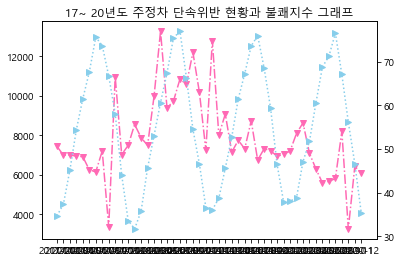

In [9]:
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')

fig, ax1 = plt.subplots()
ax1.plot(car_date,car_count, color = 'hotpink',ls='-.',marker='v',label ='주정차단속위반')

ax2 = ax1.twinx()
ax2.plot(car_date,dis_data, color = 'skyblue',ls=':',marker='>',label = '불쾌지수')

plt.title('17~ 20년도 주정차 단속위반 현황과 불쾌지수 그래프')
plt.show()

선그래프를 사용한 이유는 선그래프로 두 데이터 간의 상승 하강 관계를 확인해보기 위해서이다.

처음에는 불쾌지수가 높으면 사람들의 자차 사용이 많아질거라 예상하여 주정차 단속위반이 높아질거라 예상하였다.

하지만 주정차 단속위반 현황과 불쾌지수 의 관계는 크게 연관이 없었다.

물론 17년도부터 20년도까지의 데이터만 확인하였지만 13년도부터 20년도까지 전체적인 그래프를 확인 해본 결과 그래프가 너무 복잡해지고 또한 비슷하게 뚜렷한 연관성을 찾지 못하였다.

#과제 2. html 안의 테이블 데이터 읽기 & 그래프 그리기

1.데이터 설명

사용할 데이터

국가별 코로나 감염수, 사망수
https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data

국가별 인구수
https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)

2.데이터 선택 이유

코로나 19로 인하여 해외여행을 못가고있다. 11월부터 위드 코로나가 시작되고 백신을 2차까지 맞게 되면 이제 점차 해외여행이 가능해질것이라고 기대가 된다.

하지만 해외여행을 가기전 여행지를 선정할때 그 나라가 코로나 방역을 잘 하고 있었는지를 확인해 갈만한 국가인지 확인하고 그에 따라 해외 여행지를 선택하고 싶었다.

국가별 감염수를 인구의 퍼센트로 나타내고 상위 10개국을 확인하여 코로나 상황이 완화되었을때 해외여행 가기에 부적절한 국가를 파악하고자 한다.

In [10]:
url_covid = "https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data"

url_popuation = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"

df_c = pd.read_html(url_covid)
df_p = pd.read_html(url_popuation)

df_c[0]
df_p[0]

,Location,Location.1,Cases,Deaths,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,World[a],242033650,4922065,NaN,NaN,NaN,NaN
1,NaN,United States,45218907,731263,NaN,NaN,NaN,NaN
2,NaN,European Union[b],39161811,786664,NaN,NaN,NaN,NaN
3,NaN,India,34127450,452811,NaN,NaN,NaN,NaN
4,NaN,Brazil,21680488,604228,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
191,NaN,Marshall Islands,4,—,NaN,NaN,NaN,NaN
192,NaN,Samoa,3,—,NaN,NaN,NaN,NaN
193,NaN,Kiribati,2,—,NaN,NaN,NaN,NaN
194,NaN,Federated States of Micronesia,1,0,NaN,NaN,NaN,NaN


,Country/Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue (New Zealand),Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


3.데이터 전처리 내용

모든 데이터에서는 나라명을 행이름, header을 열이름으로 지정한다.

그 후 코로나 확진자 데이터에서는 확진자 수 열을 가져온다.

인구수 데이터에서는 19년 7월 기준 인구를 가져온다.

In [11]:
df_c = pd.read_html(url_covid, header = 0, index_col = 1)
df_p = pd.read_html(url_popuation, header = 0 , index_col = 0)

df_c[0]
df_p[0]

,Location,Cases,Deaths,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
Location.1,,,,,,,
World[a],NaN,242033650,4922065,NaN,NaN,NaN,NaN
United States,NaN,45218907,731263,NaN,NaN,NaN,NaN
European Union[b],NaN,39161811,786664,NaN,NaN,NaN,NaN
India,NaN,34127450,452811,NaN,NaN,NaN,NaN
Brazil,NaN,21680488,604228,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Marshall Islands,NaN,4,—,NaN,NaN,NaN,NaN
Samoa,NaN,3,—,NaN,NaN,NaN,NaN
Kiribati,NaN,2,—,NaN,NaN,NaN,NaN


,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
Country/Area,,,,,
China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
India,Asia,Southern Asia,1352642280,1366417754,+1.02%
United States,Americas,Northern America,327096265,329064917,+0.60%
Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...
Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
Niue (New Zealand),Oceania,Polynesia,1620,1615,−0.31%
Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%


In [12]:
covid = df_c[0].iloc[:195,1]
population = df_p[0].iloc[:,3]

covid
population

Location.1
World[a]                          242033650
United States                      45218907
European Union[b]                  39161811
India                              34127450
Brazil                             21680488
                                    ...    
Vanuatu                                   4
Marshall Islands                          4
Samoa                                     3
Kiribati                                  2
Federated States of Micronesia            1
Name: Cases, Length: 195, dtype: object

Country/Area
China[a]                             1433783686
India                                1366417754
United States                         329064917
Indonesia                             270625568
Pakistan                              216565318
                                        ...    
Falkland Islands (United Kingdom)          3377
Niue (New Zealand)                         1615
Tokelau (New Zealand)                      1340
Vatican City[z]                             799
World                                7713468100
Name: Population(1 July 2019), Length: 234, dtype: int64

이후 인덱스가 같은것들을 합쳐서 불러온다 ( 국가이름이 같은 나라들만 가져온다. )

In [13]:
result = pd.concat([covid,population],axis=1, join='inner')
result = result.sort_values(by = ['Cases'])
result

,Cases,Population(1 July 2019)
Kazakhstan,1001369,18551427
Cameroon,100289,25876380
El Salvador,110188,6453553
Brunei,11386,433285
Central African Republic,11478,4745185
...,...,...
Cuba,940127,11333483
Morocco,942967,36471769
Yemen,9596,29161922
Rwanda,99252,12626950


열간 숫자 계산을 하기위해서 모든 데이터 타입을 int로 변환한다.

In [14]:
result = result.astype('int')

In [15]:
result['Cases'] = (result['Cases'] / result['Population(1 July 2019)']) * 100

result

,Cases,Population(1 July 2019)
Kazakhstan,5.397800,18551427
Cameroon,0.387570,25876380
El Salvador,1.707401,6453553
Brunei,2.627832,433285
Central African Republic,0.241887,4745185
...,...,...
Cuba,8.295129,11333483
Morocco,2.585471,36471769
Yemen,0.032906,29161922
Rwanda,0.786033,12626950


4.그래프 결과 해석

Text(0.5, 1.0, '인구당 COVID 확진자 비율 상위 10개국')

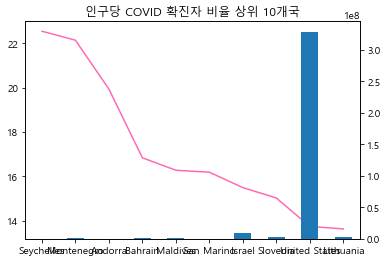

In [19]:
result = result.sort_values(by = ['Cases'], ascending=False)

Cases_per = result.iloc[:10,0]
Population = result.iloc[:10,1]

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')

fig, ax1 = plt.subplots()

ax1 = Cases_per.plot(color = 'hotpink')

ax2 = ax1.twinx()
ax2 = Population.plot(kind='bar')
plt.title('인구당 COVID 확진자 비율 상위 10개국')
plt.show()

먼저 확진자 비율은 선그래ㅡ 인구수는 막대그래프로 선정한 이유는 확진자 비율은 어느정도 요소간 차이가 별로 없어서 선그래프로 나타내었다.

인구수는 국가별 격차가 커서 선 그래프로 그리기에는 부적합 하여 막대그래프를 사용하였다.

확진자 비율만 생각하고 상위 10개국을 출력하면 미국을 제외한 다른 9개국은 인구수가 너무 적어 별 의미가 없는거 같다.

그러므로 이번에는 인구수 상위 10개국의 코로나 확진비율을 확인해본다.

Text(0.5, 1.0, '인구수 상위 10개국의 코로나 확진 비율')

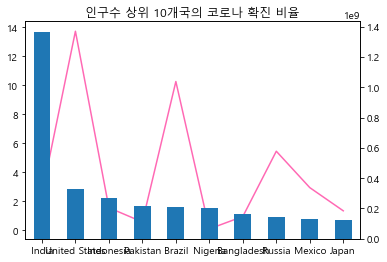

In [18]:
result = result.sort_values(by = ['Population(1 July 2019)'], ascending=False)

Cases_per1 = result.iloc[:10,0]
Population1 = result.iloc[:10,1]

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')

fig, ax1 = plt.subplots()

ax1 = Cases_per1.plot(color = 'hotpink')

ax2 = ax1.twinx()
ax2 = Population1.plot(kind='bar')
plt.title('인구수 상위 10개국의 코로나 확진 비율')
plt.show()

확진자 비율을 확인해본 결과 여행가기 어려운 나라는 USA, Brazil, Russia, Mexico, Japan 정도가 될 것 같다.

#201600282 엄기산